START NOTEBOOK

## Set-up 

In [1]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

import mpld3
mpld3.enable_notebook()

# Plot graphs within this document
%matplotlib inline

# Plot graphs outside (for interaction)
# %matplotlib

from pestmob import *
from mixinglayer import *

### Pesticide, soil type and runoff calibration parameter.  

In [2]:
# Soil and pesticide
pesticide = 'Metalaxyl'
initial_condition = 'mean'
soil_type = 'Crop Soil'
soil = 'Alteck'
soil_short = 'Crop'

pesti_obs = choose_pesticide(
    pesticide,
    soil)

# Kd ranges to test
Kd_pest_sterile = pesti_obs[0]
Kd_pest_living = pesti_obs[1]

# Initial concentrations and mass out observed
pest_dict_S_1st = pesti_obs[2]
pest_dict_L_1st = pesti_obs[3]
pest_dict_S_2nd = pesti_obs[4]
pest_dict_L_2nd = pesti_obs[5]

# Assumed (used to calculate Reynolds number)
runoff_vel = 10.0  # mm/min

### Microcosm

In [3]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
soil_height1 = 20  # Mixing layer depth in mm
soil_height2 = 20  # mm

### Soil hydrological characteristics

In [4]:
if soil == 'Alteck':
    kSat = 2.24  # mm/min (13.45 cm/h - Crop Soil) 
    psi = 1100  # soil suction Alteck (mm)
    eff_height = 0.80
elif soil == 'Rouff': 
    kSat = 17.62*10/60  # mm/min (17.62 cm/h - Vine Soil) 
    psi = 1100  # soil suction Alteck (mm)
    eff_height = 0.76
    
# Soil characteristics (Equivalent for Alteck and Rouffach)
# Initial bulk density options:
pb_i0 = 0.99/10**3  # bulk density (g/cm^3) -> g/mm^3  (M. Trautmann)
pb_i1 = 2.61/10**3 # inital 1st pulse, calc. from experiment cond.
pb_i2 = 3.59/10**3 # initial 2nd pulse, calc. from experiment cond.

# Final bulk density options (1st and 2nd pulses)
pb_f1 = 3.59/10**3 # final1, calculated from experimental conditions.
pb_f2 = 3.76/10**3 # final2, calculated from experimental conditions.

### Store results

In [5]:
output_hydro_params = {
    soil_short : [{'R1_FA':[],
              'R2_ALL':[],
              'Err1':[{'Fresh':[], 'Aged':[]}],
              'Err2':[{'SF':[], 'SA':[], 'LF':[], 'LA':[]}],
              'Ksat2':[{'SF':[], 'SA':[], 'LF':[], 'LA':[]}]
             }]
    }

In [6]:
output_pesti_params = {
    soil_short: {'R1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'R2': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Err1': {'SF': [], 'SA': [], 'LF': [], 'LA': [],
                          'SFmax': [], 'SAmax': [], 'LFmax': [], 'LAmax': [],
                          'SFmin': [], 'SAmin': [], 'LFmin': [], 'LAmin': []},
                 'Err2': {'SF': [], 'SA': [], 'LF': [], 'LA': [],
                          'SFmax': [], 'SAmax': [], 'LFmax': [], 'LAmax': [],
                          'SFmin': [], 'SAmin': [], 'LFmin': [], 'LAmin': []},
                 'Koc1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Koc2': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Kd1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Kd2': {'SF': None, 'SA': None, 'LF': None, 'LA': None}
                 }
}

## Hydrology - 1st pulse

#### Computation

In [7]:
water_data = leachsim(kSat = kSat,
                      soil_height=soil_height1,
                      eff_height=eff_height,
                      soil = 'Alteck',
                      psi=psi)

Mass balance True
Mass balance 0.0
Mass balance 0.0


In [8]:
water_eval = leachsim2(
    kSat = [kSat],
    soil_height=soil_height1,
    eff_height = eff_height,
    soil = 'Alteck',
    isAGED = False,
    isFirstCycle=True 
)

output_hydro_params = extract_goodness(
    water_eval,
    output_hydro_params,
    soil_short,
    isFirstCycle = True,
    isAGED = False)


FRESH
--------------------------------------------
ksat high:  13.440000000000001 cm/h
ksat med12:  13.440000000000001 cm/h
ksat med30:  13.440000000000001 cm/h
ksat low:  13.440000000000001 cm/h
--------------------------------------------
R2:  0.979293137692
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -1.6576800421
55 mm/h - 12min  29.7621075344
55 mm/h - 30min  0.193397570593
30 mm/h - 30min  -4.44276801315
--------------------------------------------
Mass balance:  True True True True


In [9]:
water_eval = leachsim2(
    kSat = [kSat],
    soil_height=soil_height1,
    eff_height = eff_height,
    soil = 'Alteck',
    isAGED = True,
    isFirstCycle=True 
)

output_hydro_params = extract_goodness(
    water_eval,
    output_hydro_params,
    soil_short,
    isFirstCycle = True,
    isAGED = True)

AGED
--------------------------------------------
ksat high:  13.440000000000001 cm/h
ksat med12:  13.440000000000001 cm/h
ksat med30:  13.440000000000001 cm/h
ksat low:  13.440000000000001 cm/h
--------------------------------------------
R2:  0.978791656648
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -9.94976957607
55 mm/h - 12min  -19.8638562158
55 mm/h - 30min  -4.35039476974
30 mm/h - 30min  -15.6438758946
--------------------------------------------
Mass balance:  True True True True


In [10]:
title = "Percolated Volume [mL] - " + str(soil_type) + "1st Pulse"

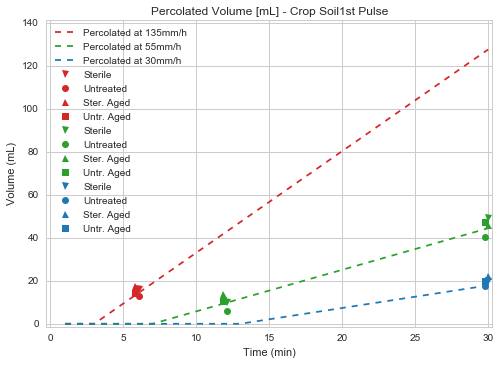

In [11]:
extract_and_plothydro(
    water_data,
    "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h", "NA",
    title,
    soil,
    isFirstCycle = True,
    isPercolation = True
)

In [12]:
hydro1 = extract(
    water_data, 
    isFirstCycle = True
)

percol_data1 = hydro1[0]
runoff_data1 = hydro1[1]
time_sizes1 = hydro1[2]

## Transport - 1st pulse

### Computation transport - 1st pulse

#### Test factor X (Sterile)

In [13]:
x = 2

In [14]:
pest_sterile_1st = pest_linear_x(
    Kd_pest_sterile,
    x,
    initial_condition,
    pest_dict_S_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_pest(
        pest_sterile_1st,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = True)

1st Pulse
Sterile Crop
--------------------------------------------
Koc tested:  [ 100.   75.   50.   30.   28.   25.   17.   15.   14.]
Best Kd (Fresh):  1.68345 cm3/g ( Num:  2 ) 
 x factor:  2 
 R2:  0.23780120165 
 Effective Koc (fresh) - [cm3/g]: 37.5
--------------------------------------------
Best Kd (Aged):  0.67338 cm3/g ( Num:  4 ) 
 x factor: No factor considered.  
 R2:  0.755567726031 
 Effective Koc (aged) [cm3/g]: 30.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -0.888598155251 | 136.872845948 | 138.1
(A) 135 mm/h - Aged  -24.8077621558 | 155.723124575 | 207.1
(B) 55 mm/h - Fresh  -30.7806588377 | 139.130875736 | 201.0
(B) 55 mm/h - Aged  213.762673865 | 158.136387628 | 50.4
(C) 55 mm/h - Fresh  -50.1039333516 | 320.232955749 | 641.8
(C) 55 mm/h - Aged  -10.513706662 | 319.28709463 | 356

#### Test factor X (Living)

In [15]:
x = 2

In [16]:
pest_living_1st = pest_linear_x(
    Kd_pest_living,
    x,
    initial_condition,
    pest_dict_L_1st,          
    pb_i1, pb_f1,
    percol_data1, percol_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    KFILM = True,
    isFirstCycle = True,
    isLiving = True)


output_pesti_params = extract_goodness_pest(
        pest_living_1st,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = True)

1st Pulse
Living Crop
--------------------------------------------
Koc tested:  [ 100.   75.   50.   30.   28.   25.   17.   15.   14.]
Best Kd (Fresh):  0.95874 cm3/g ( Num:  4 ) 
 x factor:  2 
 R2:  0.457774354555 
 Effective Koc (fresh) - [cm3/g]: 15.0
--------------------------------------------
Best Kd (Aged):  0.447412 cm3/g ( Num:  9 ) 
 x factor: No factor considered.  
 R2:  0.877477519311 
 Effective Koc (aged) [cm3/g]: 14.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  77.7908743534 | 258.50793131 | 145.4
(A) 135 mm/h - Aged  -6.84305302184 | 264.099944683 | 283.5
(B) 55 mm/h - Fresh  64.251247755 | 260.173976444 | 158.4
(B) 55 mm/h - Aged  1.30360454889 | 265.719354732 | 262.3
(C) 55 mm/h - Fresh  -35.2185812635 | 437.209795052 | 674.9
(C) 55 mm/h - Aged  20.2676320375 | 433.204010599 | 360.2

#### Time series

In [17]:
data_stack = pest_sterile_1st['Data_stack']
sterile1 = extract_pest(data_stack)

mass_percol_sterile1 = sterile1[0]
mass_pond_sterile1 = sterile1[1]

In [18]:
data_stack = pest_living_1st['Data_stack']
living1 = extract_pest(data_stack)

mass_percol_living1 = living1[0]
mass_pond_living1 = living1[1]

## Plotting transport

### Sterile (1st Pulse, Crop Soil)

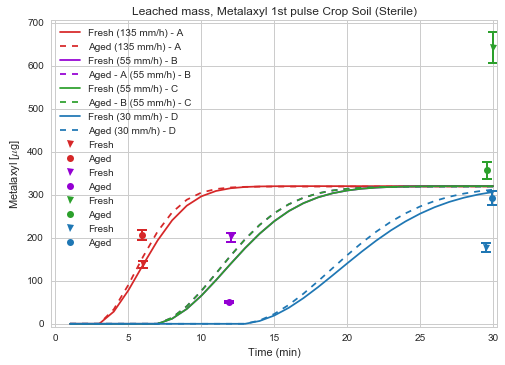

In [19]:
pestiplot_condition(
    mass_percol_sterile1,
    pest_dict_S_1st,
    pesticide,
    soil_type,
    cycle = '1st pulse',
    LEACH = True,
    STERILE = True
)

### Living (1st Pulse, Crop Soil)

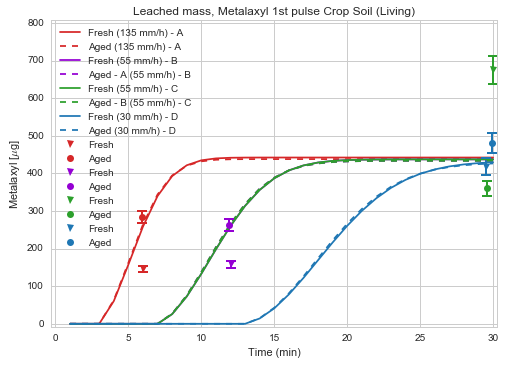

In [20]:
pestiplot_condition(
    mass_percol_living1,
    pest_dict_L_1st,
    pesticide,
    soil_type,
    cycle = '1st pulse',
    LEACH = True,
    STERILE = False
)

# Hydrology - 2nd pulse

### Inverse Ksat determination 

Based on hisotric rainfall pattern, fresh and aged.

In [21]:
water2_ktest = leachsim3(
    soil,
    kSat = [ kSat/5, kSat/10, kSat/15,
        kSat/25, kSat/50,  kSat/75, 
        kSat/100, kSat/125, kSat/150, 
        kSat/175, kSat/200, kSat/250,
        kSat/350, kSat/500, kSat/700, kSat/1000],
    soil_height=soil_height2,
    isFirstCycle = False
)

output_hydro_params = extract_goodness(
    water2_ktest,
    output_hydro_params,
    soil_short,
    isFirstCycle = False,
    isAGED = None
)

R2:  0.987094816986
--------------------------------------------
Sterile, Fresh Soil
ksat high:  0.5376000000000001 cm/h | Error % 2.23130461905
ksat med12:  0.5376000000000001 cm/h | Error % 3.03794067885
ksat med30:  0.07680000000000001 cm/h | Error % -1.32673504375
ksat low:  2.6880000000000006 cm/h | Error % 2.71814968991
--------------------------------------------
Sterile, Aged Soil
ksat high:  0.038400000000000004 cm/h | Error % -3.96936053404
ksat med12:  0.01344 cm/h | Error % 96.4892134055
ksat med30:  0.01344 cm/h | Error % 0.668887214674
ksat low:  0.01344 cm/h | Error % 772.613137848
--------------------------------------------
Living, Fresh Soil
ksat high:  0.17920000000000003 cm/h | Error % 1.83525165621
ksat med12:  0.5376000000000001 cm/h | Error % 1.25918043976
ksat med30:  0.01344 cm/h | Error % 43.2893178308
ksat low:  0.05376 cm/h | Error % -1.06637611809
--------------------------------------------
Living, Fresh Aged
ksat high:  0.07680000000000001 cm/h | Error % 

### Percolation - 2nd pulse

In [22]:
title = "Percolated Volume [mL] - " + str(soil_type) +  " 2nd Pulse"

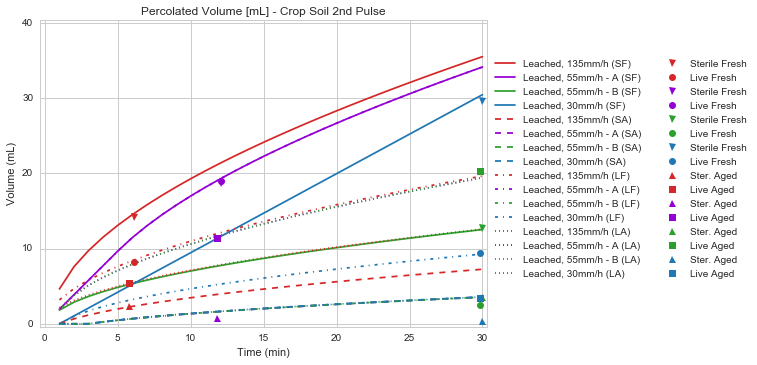

In [23]:
extract_and_plothydro(
    water2_ktest,
    "Leached, 135mm/h", "Leached, 55mm/h - A", "Leached, 55mm/h - B", "Leached, 30mm/h",
    title,
    soil,
    isFirstCycle = False,
    isPercolation = True
)

### Ponding - 2nd pulse

In [24]:
title = "Ponded Volume [mL] [mL] - " + str(soil_type) +  " 2nd Pulse"

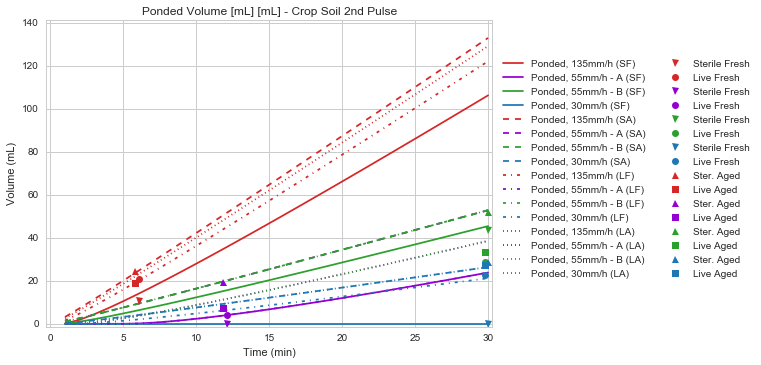

In [25]:
extract_and_plothydro(
    water2_ktest,
    "Ponded, 135mm/h", "Ponded, 55mm/h - A", "Ponded, 55mm/h - B", "Ponded, 30mm/h",
    title,
    soil,
    isFirstCycle = False,
    isPercolation = False
)

In [26]:
hydro2 = extract(
    water2_ktest,
    isFirstCycle = False
)
percol_data2 = hydro2[0]
runoff_data2 = hydro2[1]
time_sizes2 = hydro2[2]

## Transport - 2nd pulse

### Computation transport - 2nd Pulse

#### Kd optimal (sterile)

In [27]:
x = 2

In [28]:
pest_sterile_2nd = pest_linear_x(
    Kd_pest_sterile,
    x,
    initial_condition,
    pest_dict_S_2nd,
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2,
    d, runoff_vel,
    soil = "Alteck",
    isFirstCycle = False,
    isLiving = False)

output_pesti_params = extract_goodness_pest(
        pest_sterile_2nd,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = False)

2nd Pulse
Sterile Crop
--------------------------------------------
Koc tested:  [ 100.   75.   50.   30.   28.   25.   17.   15.   14.]
Best Kd (Fresh):  1.68345 cm3/g ( Num:  2 ) 
 x factor:  2 
 R2:  0.0441886279242 
 Effective Koc (fresh) - [cm3/g]: 37.5
--------------------------------------------
Best Kd (Aged):  1.1223 cm3/g ( Num:  3 ) 
 x factor: No factor considered.  
 R2:  0.988349363793 
 Effective Koc (aged) [cm3/g]: 50.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  1825.78933434 | 160.803409417 | 8.35
(A) 135 mm/h - Aged  -60.6952671353 | 14.7667881373 | 37.57
(B) 55 mm/h - Fresh  -27.1967192384 | 211.347924051 | 290.3
(B) 55 mm/h - Aged  No obs | 18.6437031132 | nan
(C) 55 mm/h - Fresh  68.3133143111 | 157.036322252 | 93.3
(C) 55 mm/h - Aged  -22.5158432942 | 81.4769295676 | 82.2
(D) 30 m

#### Kd optimal (living)

In [29]:
x = 2

In [30]:
pest_living_2nd = pest_linear_x(
    Kd_pest_living,
    x,
    initial_condition,
    pest_dict_L_2nd,          
    pb_i1, pb_f1,
    percol_data2, runoff_data2,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil = "Alteck",
    KFILM = True,
    isFirstCycle = False,
    isLiving = True)

output_pesti_params = extract_goodness_pest(
        pest_living_2nd,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = False)

2nd Pulse
Living Crop
--------------------------------------------
Koc tested:  [ 100.   75.   50.   30.   28.   25.   17.   15.   14.]
Best Kd (Fresh):  1.5979 cm3/g ( Num:  3 ) 
 x factor:  2 
 R2:  0.52191162149 
 Effective Koc (fresh) - [cm3/g]: 25.0
--------------------------------------------
Best Kd (Aged):  0.79895 cm3/g ( Num:  6 ) 
 x factor: No factor considered.  
 R2:  0.828257245256 
 Effective Koc (aged) [cm3/g]: 25.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -40.3493632446 | 104.651077124 | 175.44
(A) 135 mm/h - Aged  58.6916363123 | 63.5242620158 | 40.03
(B) 55 mm/h - Fresh  -31.433481819 | 186.843762043 | 272.5
(B) 55 mm/h - Aged  -16.4569556626 | 140.770029709 | 168.5
(C) 55 mm/h - Fresh  120.938738729 | 77.5494972939 | 35.1
(C) 55 mm/h - Aged  2.38523133506 | 163.487380524 | 146.1


#### Time series

In [31]:
data_stack = pest_sterile_2nd['Data_stack']
sterile2 = extract_pest(data_stack)

data_stack = pest_living_2nd['Data_stack']
living2 = extract_pest(data_stack)

mass_percol_sterile2 = sterile2[0]
mass_pond_sterile2 = sterile2[1]

mass_percol_living2 = living2[0]
mass_pond_living2 = living2[1]

## Plotting transport 

### Sterile (2nd Pulse)

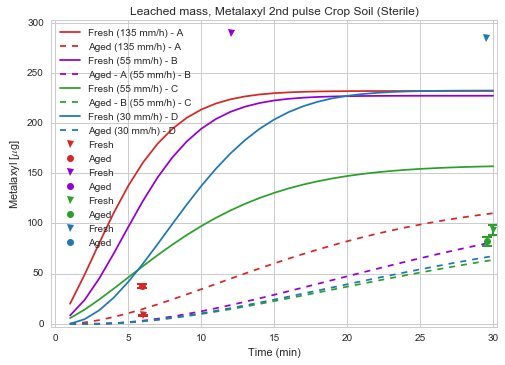

In [32]:
pestiplot_condition(
    mass_percol_sterile2,
    pest_dict_S_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = True
)

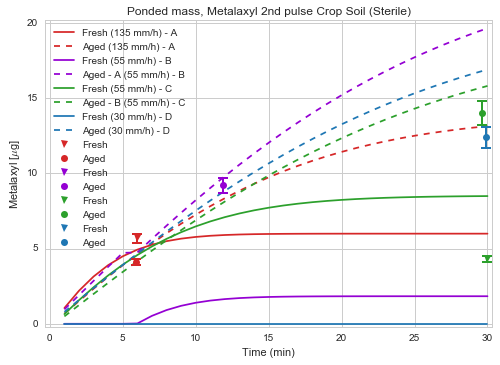

In [33]:
pestiplot_condition(
    mass_pond_sterile2,
    pest_dict_S_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = True
)

### Living (2nd Pulse)

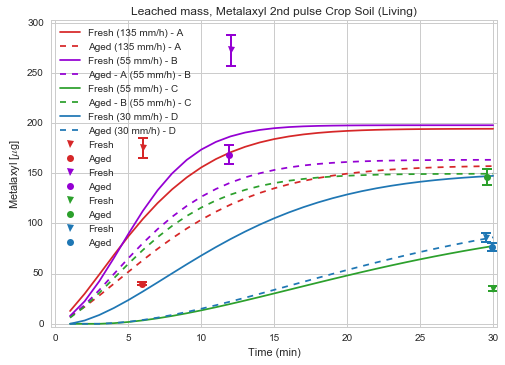

In [34]:
pestiplot_condition(
    mass_percol_living2,
    pest_dict_L_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = False
)

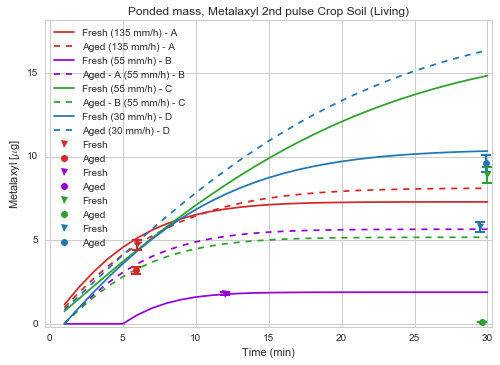

In [35]:
pestiplot_condition(
    mass_pond_living2,
    pest_dict_L_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = False
)

END NOTEBOOK

### Max values

In [36]:
initial_condition = 'max'

#### 1st Pulse

In [37]:
Kd1_SF = output_pesti_params[soil_short]['Kd1']['SF']*10**3  # Convert back to mm3/g (model units)
Kd1_SA = output_pesti_params[soil_short]['Kd1']['SA']*10**3
Kd1_choice_sterile = [Kd1_SF, Kd1_SA]

Kd1_LF = output_pesti_params[soil_short]['Kd1']['LF']*10**3
Kd1_LA = output_pesti_params[soil_short]['Kd1']['LA']*10**3
Kd1_choice_living = [Kd1_LF, Kd1_LA]

In [38]:
max_sterile_1st = pest_Kd_choice(
    Kd1_choice_sterile,
    x,
    initial_condition,
    pest_dict_S_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_maxmin(
        max_sterile_1st,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = True)


1st Pulse
Sterile Crop
--------------------------------------------
Koc tested:  [ 75.  30.]
Best Kd (Fresh):  1.68345 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  0.326192014649 
 Effective Koc (fresh) - [cm3/g]: 37.5
--------------------------------------------
Best Kd (Aged):  0.67338 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  0.0202205355867 
 Effective Koc (aged) [cm3/g]: 30.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  64.8607597933 | 227.672709274 | 138.1
(A) 135 mm/h - Aged  7.42543316358 | 222.478072082 | 207.1
(B) 55 mm/h - Fresh  -2.01731414749 | 196.945198564 | 201.0
(B) 55 mm/h - Aged  348.265567256 | 225.925845897 | 50.4
(C) 55 mm/h - Fresh  -29.3701653095 | 453.302279044 | 641.8
(C) 55 mm/h - Aged  27.8470238372 | 456.158181051 | 356.8
(D) 30 mm/h - Fresh  145.240078427 | 442.

In [39]:
max_living_1st = pest_Kd_choice(
    Kd1_choice_living,
    x,
    initial_condition,
    pest_dict_L_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_maxmin(
        max_living_1st,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = True)

1st Pulse
Sterile Crop
--------------------------------------------
Koc tested:  [ 42.71317829  19.93281654]
Best Kd (Fresh):  0.95874 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -0.122721056347 
 Effective Koc (fresh) - [cm3/g]: 21.3565891473
--------------------------------------------
Best Kd (Aged):  0.447412 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  -0.677984790503 
 Effective Koc (aged) [cm3/g]: 19.9328165375
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  180.895459622 | 408.421998291 | 145.4
(A) 135 mm/h - Aged  33.4692215214 | 378.385243013 | 283.5
(B) 55 mm/h - Fresh  137.790515205 | 376.660176085 | 158.4
(B) 55 mm/h - Aged  46.1980256075 | 383.477421169 | 262.3
(C) 55 mm/h - Fresh  -5.17060752479 | 640.003569815 | 674.9
(C) 55 mm/h - Aged  75.3817519027 | 631.725070353 | 360.2
(D) 3

#### 2ndPulse Pulse

In [40]:
Kd2_SF = output_pesti_params[soil_short]['Kd2']['SF']*10**3
Kd2_SA = output_pesti_params[soil_short]['Kd2']['SA']*10**3
Kd2_choice_sterile = [Kd2_SF, Kd2_SA]

Kd2_LF = output_pesti_params[soil_short]['Kd2']['LF']*10**3
Kd2_LA = output_pesti_params[soil_short]['Kd2']['LA']*10**3
Kd2_choice_living = [Kd2_LF, Kd2_LA]

In [41]:
max_sterile_2nd = pest_Kd_choice(
    Kd2_choice_sterile,
    x,
    initial_condition,
    pest_dict_S_2nd,          
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2, 
    d, runoff_vel,
    soil,
    isFirstCycle = False,
    isLiving = False)

output_pesti_params = extract_goodness_maxmin(
        max_sterile_2nd,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = False)

2nd Pulse
Sterile Crop
--------------------------------------------
Koc tested:  [ 75.  50.]
Best Kd (Fresh):  1.68345 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -1.51635043091 
 Effective Koc (fresh) - [cm3/g]: 37.5
--------------------------------------------
Best Kd (Aged):  1.1223 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  0.989922031168 
 Effective Koc (aged) [cm3/g]: 50.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  2846.27322883 | 246.013814608 | 8.35
(A) 135 mm/h - Aged  -38.2841234228 | 23.1866548301 | 37.57
(B) 55 mm/h - Fresh  11.5516535807 | 323.834450345 | 290.3
(B) 55 mm/h - Aged  No obs | 27.9735735617 | nan
(C) 55 mm/h - Fresh  195.421627633 | 275.628378582 | 93.3
(C) 55 mm/h - Aged  28.2496118079 | 122.250438607 | 82.2
(D) 30 mm/h - Fresh  24.1905036431 | 348.235034264 | 28

In [42]:
max_living_2nd = pest_Kd_choice(
    Kd2_choice_living,
    x,
    initial_condition,
    pest_dict_L_2nd,          
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2, 
    d, runoff_vel,
    soil,
    isFirstCycle = False,
    isLiving = True)

output_pesti_params = extract_goodness_maxmin(
        max_living_2nd,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = False)

2nd Pulse
Living Crop
--------------------------------------------
Koc tested:  [ 50.  25.]
Best Kd (Fresh):  1.5979 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -0.054572146748 
 Effective Koc (fresh) - [cm3/g]: 25.0
--------------------------------------------
Best Kd (Aged):  0.79895 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  -1.72833062276 
 Effective Koc (aged) [cm3/g]: 25.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -8.22720374299 | 161.006193753 | 175.44
(A) 135 mm/h - Aged  150.034591828 | 100.088847109 | 40.03
(B) 55 mm/h - Fresh  6.04335571493 | 288.968144323 | 272.5
(B) 55 mm/h - Aged  32.9900996752 | 224.088317953 | 168.5
(C) 55 mm/h - Fresh  318.035849566 | 146.730583198 | 35.1
(C) 55 mm/h - Aged  70.8544684102 | 263.554582755 | 146.1
(D) 30 mm/h - Fresh  189.678828337 | 299.10

### Min values

In [43]:
initial_condition = 'min'

#### 1st Pulse

In [44]:
min_sterile_1st = pest_Kd_choice(
    Kd1_choice_sterile,
    x,
    initial_condition,
    pest_dict_S_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_maxmin(
        min_sterile_1st,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = True)

1st Pulse
Sterile Crop
--------------------------------------------
Koc tested:  [ 75.  30.]
Best Kd (Fresh):  1.68345 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -0.370047080262 
 Effective Koc (fresh) - [cm3/g]: 37.5
--------------------------------------------
Best Kd (Aged):  0.67338 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  0.0950465746031 
 Effective Koc (aged) [cm3/g]: 30.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -31.9307665578 | 94.0036113837 | 138.1
(A) 135 mm/h - Aged  -57.0409574752 | 88.9681770688 | 207.1
(B) 55 mm/h - Fresh  -59.5440035279 | 81.316552909 | 201.0
(B) 55 mm/h - Aged  79.2597804734 | 90.3469293586 | 50.4
(C) 55 mm/h - Fresh  -70.8377013938 | 187.163632455 | 641.8
(C) 55 mm/h - Aged  -48.8744371612 | 182.416008209 | 356.8
(D) 30 mm/h - Fresh  1.25698904206 | 1

In [45]:
min_living_1st = pest_Kd_choice(
    Kd1_choice_living,
    x,
    initial_condition,
    pest_dict_L_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_maxmin(
        min_living_1st,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = True)

1st Pulse
Sterile Crop
--------------------------------------------
Koc tested:  [ 42.71317829  19.93281654]
Best Kd (Fresh):  0.95874 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -0.370796299809 
 Effective Koc (fresh) - [cm3/g]: 21.3565891473
--------------------------------------------
Best Kd (Aged):  0.447412 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  -0.269999435057 
 Effective Koc (aged) [cm3/g]: 19.9328165375
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  12.7751781612 | 163.975109046 | 145.4
(A) 135 mm/h - Aged  -45.8417707169 | 153.538580017 | 283.5
(B) 55 mm/h - Fresh  -4.53078966345 | 151.223229173 | 158.4
(B) 55 mm/h - Aged  -40.6767635165 | 155.604849296 | 262.3
(C) 55 mm/h - Fresh  -61.9258951806 | 256.962133426 | 674.9
(C) 55 mm/h - Aged  -28.8347903484 | 256.337085165 | 360.2
(

#### 2nd Pulse

In [46]:
min_sterile_2nd = pest_Kd_choice(
    Kd2_choice_sterile,
    x,
    initial_condition,
    pest_dict_S_2nd,          
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2, 
    d, runoff_vel,
    soil,
    isFirstCycle = False,
    isLiving = False)

output_pesti_params = extract_goodness_maxmin(
        min_sterile_2nd,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = False)

2nd Pulse
Sterile Crop
--------------------------------------------
Koc tested:  [ 75.  50.]
Best Kd (Fresh):  1.68345 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -0.979452726136 
 Effective Koc (fresh) - [cm3/g]: 37.5
--------------------------------------------
Best Kd (Aged):  1.1223 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  0.937819697331 
 Effective Koc (aged) [cm3/g]: 50.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  856.321479241 | 79.8528435166 | 8.35
(A) 135 mm/h - Aged  -83.1064108478 | 6.34692144448 | 37.57
(B) 55 mm/h - Fresh  -65.9450920576 | 98.8613977569 | 290.3
(B) 55 mm/h - Aged  No obs | 9.31383266462 | nan
(C) 55 mm/h - Fresh  -58.7949990109 | 38.4442659228 | 93.3
(C) 55 mm/h - Aged  -73.2812983963 | 40.7034205283 | 82.2
(D) 30 mm/h - Fresh  -61.1574334773 | 113.032504871

In [47]:
min_living_2nd = pest_Kd_choice(
    Kd2_choice_living,
    x,
    initial_condition,
    pest_dict_L_2nd,          
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2, 
    d, runoff_vel,
    soil,
    isFirstCycle = False,
    isLiving = True)

output_pesti_params = extract_goodness_maxmin(
        min_living_2nd,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = False)

2nd Pulse
Living Crop
--------------------------------------------
Koc tested:  [ 50.  25.]
Best Kd (Fresh):  1.5979 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -0.42299005121 
 Effective Koc (fresh) - [cm3/g]: 25.0
--------------------------------------------
Best Kd (Aged):  0.79895 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  -1.98446336013 
 Effective Koc (aged) [cm3/g]: 25.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -72.3371868886 | 48.5316393227 | 175.44
(A) 135 mm/h - Aged  -39.300422949 | 24.2980406935 | 40.03
(B) 55 mm/h - Fresh  -68.5464911474 | 85.7108116234 | 272.5
(B) 55 mm/h - Aged  -66.4318834472 | 56.5622763915 | 168.5
(C) 55 mm/h - Fresh  -81.0548281073 | 6.64975533435 | 35.1
(C) 55 mm/h - Aged  -64.7765655652 | 66.5239816616 | 146.1
(D) 30 mm/h - Fresh  -45.9553377573 | 90

### Hydrology summary

In [48]:
import pprint

### R-squared

In [49]:
# 1st pulse
output_hydro_params[soil_short][0]['R1_FA']

[0.97929313769194559, 0.97879165664847734]

In [50]:
# 2nd pulse 
output_hydro_params[soil_short][0]['R2_ALL']

[0.98709481698576096]

### Percent error

In [51]:
# 1st pulse
pprint.pprint(output_hydro_params[soil_short][0]['Err1'][0])

{'Aged': [-9.9497695760673803,
          -19.863856215843292,
          -4.3503947697446481,
          -15.643875894555064],
 'Fresh': [-1.6576800420983793,
           29.76210753442875,
           0.19339757059332816,
           -4.4427680131527749]}


In [52]:
# 2nd pulse
pprint.pprint(output_hydro_params[soil_short][0]['Err2'][0])

{'LA': [0.1041023527855152,
        2.9320569323726215,
        -4.2848362010996981,
        5.4353835686236112],
 'LF': [1.8352516562050032,
        1.2591804397577877,
        43.289317830834683,
        -1.0663761180911517],
 'SA': [-3.9693605340439162,
        96.489213405488485,
        0.66888721467447454,
        772.61313784789968],
 'SF': [2.2313046190469246,
        3.0379406788452177,
        -1.3267350437542793,
        2.7181496899109967]}


## Transport 

### Summary tables

0. High rainfall intensity (135 mm/h) at 6 min.
1. Medium rainfall intensity (55 mm/h) at 12 min.
2. Medium rainfall intensity (55 mm/h) at 30 min.
3. Low rainfall intensity (30 mm/h) at 30 min.

    a) LA : Living Aged

    b) LF : Living Fresh

    c) SA : Sterile Aged

    d) SF : Sterile Fresh
    
   
To compute max and min simualtions, the optimal Kd values obtained from the mean scenario were used. That is, the model has not been fitted to consider these extreme uncertainty scenarios.

- max: initial calculated concentration + measurement error

- min: initial calculated concentraion - measurement error

 

In [53]:
import pandas as pd

### Percent error

In [54]:
pd.DataFrame.from_dict(output_pesti_params[soil_short]['Err1'], orient='columns')

,LA,LAmax,LAmin,LF,LFmax,LFmin,SA,SAmax,SAmin,SF,SFmax,SFmin
0,-6.843053,33.469222,-45.841771,77.790874,180.895460,12.775178,-24.807762,7.425433,-57.040957,-0.888598,64.860760,-31.930767
1,1.303605,46.198026,-40.676764,64.251248,137.790515,-4.530790,213.762674,348.265567,79.259780,-30.780659,-2.017314,-59.544004
2,20.267632,75.381752,-28.834790,-35.218581,-5.170608,-61.925895,-10.513707,27.847024,-48.874437,-50.103933,-29.370165,-70.837701
3,-11.349012,30.622119,-46.997049,2.695055,51.919687,-39.006598,6.329173,51.910062,-39.251715,73.248534,145.240078,1.256989


In [55]:
pd.DataFrame.from_dict(output_pesti_params[soil_short]['Err2'], orient='columns')

,LA,LAmax,LAmin,LF,LFmax,LFmin,SA,SAmax,SAmin,SF,SFmax,SFmin
0,58.691636,150.034592,-39.300423,-40.349363,-8.227204,-72.337187,-60.6953,-38.2841,-83.1064,1825.789334,2846.273229,856.321479
1,-16.456956,32.990100,-66.431883,-31.433482,6.043356,-68.546491,No obs,No obs,No obs,-27.196719,11.551654,-65.945092
2,2.385231,70.854468,-64.776566,120.938739,318.035850,-81.054828,-22.5158,28.2496,-73.2813,68.313314,195.421628,-58.794999
3,12.674171,94.784032,-72.371078,71.490652,189.678828,-45.955338,No obs,No obs,No obs,-18.483465,24.190504,-61.157433


### R-squared & Sorption parameters 

In [56]:
# 1st and 2nd Pulse
df = pd.DataFrame.from_dict(output_pesti_params[soil_short], orient='columns') 
df2 = df[['R1', 'R2', 'Kd1', 'Kd2', 'Koc1', 'Koc2']].dropna(axis=0)
df2

,R1,R2,Kd1,Kd2,Koc1,Koc2
LA,0.877478,0.828257,0.447412,0.79895,14.0,25.0
LF,0.457774,0.521912,0.958740,1.59790,15.0,25.0
SA,0.755568,0.988349,0.673380,1.12230,30.0,50.0
SF,0.237801,0.044189,1.683450,1.68345,37.5,37.5


In [57]:
path = '..\ModelParameters\\' + str(soil_short) + str(pesticide) + '.csv'
df2.to_csv(path, sep=';')